### Algorithm Implemented

In [2]:
def max_substring(a: str, b: str) -> str:
    n =len(a)
    m = len(b)
    lengths = [[0] * (m + 1) for x in range(n + 1)]
    max_length = 0
    end_index = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if a[i - 1] == b[j - 1]:
                lengths[i][j] = lengths[i - 1][j - 1] + 1
                if lengths[i][j] > max_length:
                    max_length = lengths[i][j]
                    end_index = i
            else:
                lengths[i][j] = 0
    
    return a[end_index - max_length:end_index]

    ### the return statement is equivalent to the following code: ###
    # ret = ""
    # for i in range(end_index-max_length, end_index):
    #     ret += a[i]
    # return ret


In [3]:
# simple test
print(max_substring("apple", "pineapple")) # "apple"

apple


### Testing

In [4]:
import unittest

class TestAlgo(unittest.TestCase):
    def test_common_substring(self):
        self.assertEqual(max_substring("pineapple", "apple"), "apple")
        self.assertEqual(max_substring("banana", "apple"), "a")
        self.assertEqual(max_substring("orange", "banana"), "an")
    
    def test_no_common_substring(self):
        self.assertEqual(max_substring("xyz", "abc"), "")
    
    def test_identical_strings(self):
        self.assertEqual(max_substring("hello", "hello"), "hello")
    
    def test_single_character_overlap(self):
        self.assertEqual(max_substring("x", "x"), "x")
        self.assertEqual(max_substring("x", "y"), "")
    
    def test_substring_at_start(self):
        self.assertEqual(max_substring("abcdef", "abc"), "abc")
    
    def test_substring_at_end(self):
        self.assertEqual(max_substring("abcdef", "def"), "def")

    def test_substring_in_middle(self):
        self.assertEqual(max_substring("abcdef", "cde"), "cde")
    
    def test_large_strings(self):
        self.assertEqual(max_substring("a" * 1000 + "bcd", "xyz" + "bcd"), "bcd")

    def test_empty_string(self):
        self.assertEqual(max_substring("", "abc"), "")
        self.assertEqual(max_substring("abc", ""), "")
        self.assertEqual(max_substring("", ""), "")

In [5]:
# test
unittest.main(argv=[''], exit=False)

.........
----------------------------------------------------------------------
Ran 9 tests in 0.003s

OK


### Benchmarking


Benchmark Results Table:
 Length of a (n)  Length of b (m)  DP Time (s)
            1000             1000     0.061971
            1000             5000     0.338203
            1000            10000     0.646735
            1000            20000     1.268512
            5000             1000     0.319783
            5000             5000     1.642981
            5000            10000     3.297931
            5000            20000     6.691123
           10000             1000     0.634248
           10000             5000     3.365077
           10000            10000     6.946464
           10000            20000    13.723189
           20000             1000     1.289206
           20000             5000     6.793251
           20000            10000    13.657638
           20000            20000    27.163658


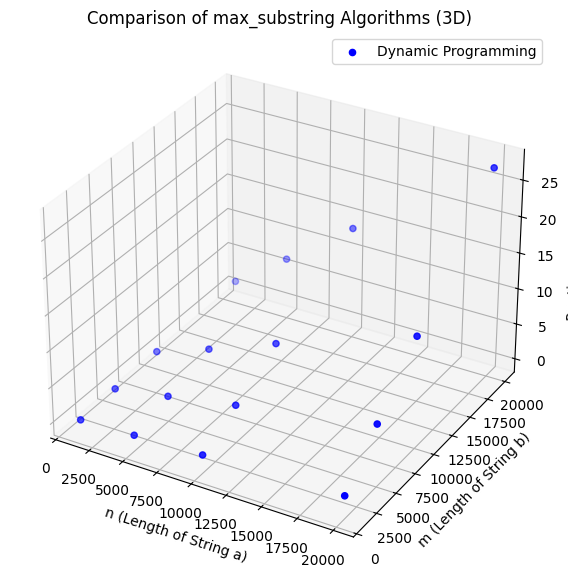

In [8]:
import time
import random
import string
import matplotlib.pyplot as plt
import pandas as pd

def generate_random_string(length):
    return ''.join(random.choices(string.ascii_letters, k=length))

def max_substring_brute_force(a: str, b: str) -> str:
    max_sub = ""
    for i in range(len(a)):
        for j in range(i, len(a)):
            sub = a[i:j+1]
            if sub in b and len(sub) > len(max_sub):
                max_sub = sub
    return max_sub

def benchmark_max_substring():
    input_sizes = [(n, m) for n in [1000, 5000, 10000, 20000] for m in [1000, 5000, 10000, 20000]]
    data = []

    for n, m in input_sizes:
        a = generate_random_string(n)
        b = generate_random_string(m)

        start_time = time.time()
        max_substring(a, b)  # Assumes defined elsewhere
        dp_time = time.time() - start_time

        # start_time = time.time()
        # max_substring_brute_force(a, b)
        # brute_time = time.time() - start_time

        data.append({
            "Length of a (n)": n,
            "Length of b (m)": m,
            "DP Time (s)": dp_time,
            # "Brute Force Time (s)": brute_time
        })

    df = pd.DataFrame(data)
    print("\nBenchmark Results Table:")
    print(df.to_string(index=False))

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    n_values = df["Length of a (n)"].to_numpy()
    m_values = df["Length of b (m)"].to_numpy()
    runtimes_dp = df["DP Time (s)"].to_numpy()
    # runtimes_brute = df["Brute Force Time (s)"].to_numpy()

    ax.scatter(n_values, m_values, runtimes_dp, c='b', marker='o', label='Dynamic Programming')
    # ax.scatter(n_values, m_values, runtimes_brute, c='r', marker='^', label='Brute Force')

    ax.set_xlabel("n (Length of String a)")
    ax.set_ylabel("m (Length of String b)")
    ax.set_zlabel("Runtime (seconds)")
    ax.set_title("Comparison of max_substring Algorithms (3D)")
    ax.legend()

    plt.show()

benchmark_max_substring()
